# Project 2
Identify a large 2-node network dataset—you can start with a dataset in a repository.
Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?

## Required Packages

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite as bp
import numpy as np
import pandas as pd


## About the Data

We will consider the yahoo finance module in python and it is a very easy module to work with.

The ticker Module, which allows access to data in pythonic way.

![Dow Jones Wiki]("https://simple.wikipedia.org/wiki/Dow_Jones_Industrial_Average" "Dow Jones Wiki")



In [17]:
import yfinance as yf

In [18]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]


In [19]:
# extract symbol from df
# add them into a list
tickers = tickers.Symbol.to_list()

In [20]:
# create a list of dfs that will be populated with the Institutional Holder df
# the institutional holder info its extracted from the symbol ticker

frames = []

for ticker in tickers:
    var = yf.Ticker(ticker)
    frame = var.institutional_holders
    frame['Comp'] = var.ticker
    frames.append(frame)

In [23]:
# create variable containing a list of all 30 companies of dow jones
all_dow = pd.concat(frames)

### Dow Jones Companies + Institutional Holders Ownership

In [24]:
all_dow

,Holder,Shares,Date Reported,% Out,Value,Comp
0,"Vanguard Group, Inc. (The)",50240763,2021-12-30,0.0880,8924266731,MMM
1,Blackrock Inc.,41810186,2021-12-30,0.0732,7426743339,MMM
2,State Street Corporation,30979936,2021-12-30,0.0542,5502966031,MMM
3,"Geode Capital Management, LLC",10780080,2021-12-30,0.0189,1914865610,MMM
4,"Charles Schwab Investment Management, Inc.",10557291,2021-12-30,0.0185,1875291600,MMM
...,...,...,...,...,...,...
5,Northern Trust Corporation,16607064,2021-12-30,0.0060,2402876090,WMT
6,Morgan Stanley,15580922,2021-12-30,0.0056,2254403604,WMT
7,Norges Bank Investment Management,15012238,2020-12-30,0.0054,2164014107,WMT
8,State Farm Mutual Automobile Insurance Co,13083050,2021-12-30,0.0047,1892986504,WMT


## Project Bipartile Graph

In [25]:
# create a graph
edges = [tuple(x) for x in all_dow[['Holder', 'Comp', 'Shares']].values.tolist()]


In [57]:
B = nx.Graph()
B.add_nodes_from(all_dow['Holder'].unique(), bipartite=0, label='holder',edge_attr=True)
B.add_nodes_from(all_dow['Comp'].unique(), bipartite=1, label='comp', edge_attr=True)

for row in edges:
    B.add_edge(row[0], row[1], shares=row[2])

In [60]:
edge_list = nx.to_edgelist(B)

In [31]:
nx.is_connected(B)

True

In [41]:
nx.is_bipartite(B)

True

### Sets

In [33]:
bottom_nodes, top_nodes = bp.sets(B)

In [34]:
top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(B) - top_nodes

In [37]:
list(top_nodes)

['Geode Capital Management, LLC',
 'Vanguard Group, Inc. (The)',
 'Morgan Stanley',
 'Dodge & Cox Inc',
 'Massachusetts Financial Services Co.',
 'Wellington Management Group, LLP',
 'Bank Of New York Mellon Corporation',
 'Berkshire Hathaway, Inc',
 'Norges Bank Investment Management',
 'Northern Trust Corporation',
 'Bank of America Corporation',
 'Dimensional Fund Advisors LP',
 'AllianceBernstein, L.P.',
 'Jennison Associates LLC',
 'Price (T.Rowe) Associates Inc',
 'Capital World Investors',
 'Capital Research Global Investors',
 'Loomis Sayles & Company, LP',
 'Charles Schwab Investment Management, Inc.',
 'Bill & Melinda Gates Foundation Trust',
 'Invesco Ltd.',
 'FMR, LLC',
 'JP Morgan Chase & Company',
 'Newport Trust Co',
 'Wells Fargo & Company',
 'Primecap Management Company',
 'ClearBridge Investments, LLC',
 'Barclays Plc',
 'Blackrock Inc.',
 'State Farm Mutual Automobile Insurance Co',
 'Flossbach von Storch AG',
 'Aristotle Capital Management, LLC',
 'Ameriprise Financ

In [39]:
list(bottom_nodes)

['JPM',
 'HON',
 'CAT',
 'CVX',
 'JNJ',
 'DOW',
 'CSCO',
 'NKE',
 'CRM',
 'WMT',
 'GS',
 'MMM',
 'VZ',
 'PG',
 'MSFT',
 'BA',
 'KO',
 'INTC',
 'UNH',
 'WBA',
 'AMGN',
 'MRK',
 'V',
 'MCD',
 'TRV',
 'DIS',
 'AXP',
 'HD',
 'IBM',
 'AAPL']

### Colors

In [51]:
color = bp.color(B)

color_dict = {0:'b', 1:'r'}

color_list = [color_dict[i[1]] for i in B.nodes.data('bipartite')]

In [52]:
pos = dict()
color = []
pos.update( (n, (1, i)) for i, n in enumerate(bottom_nodes) )
pos.update( (n, (2, i)) for i, n in enumerate(top_nodes) )


### Hello Dow Jones Graph
Institutional Holders = Blue
Companies = Red

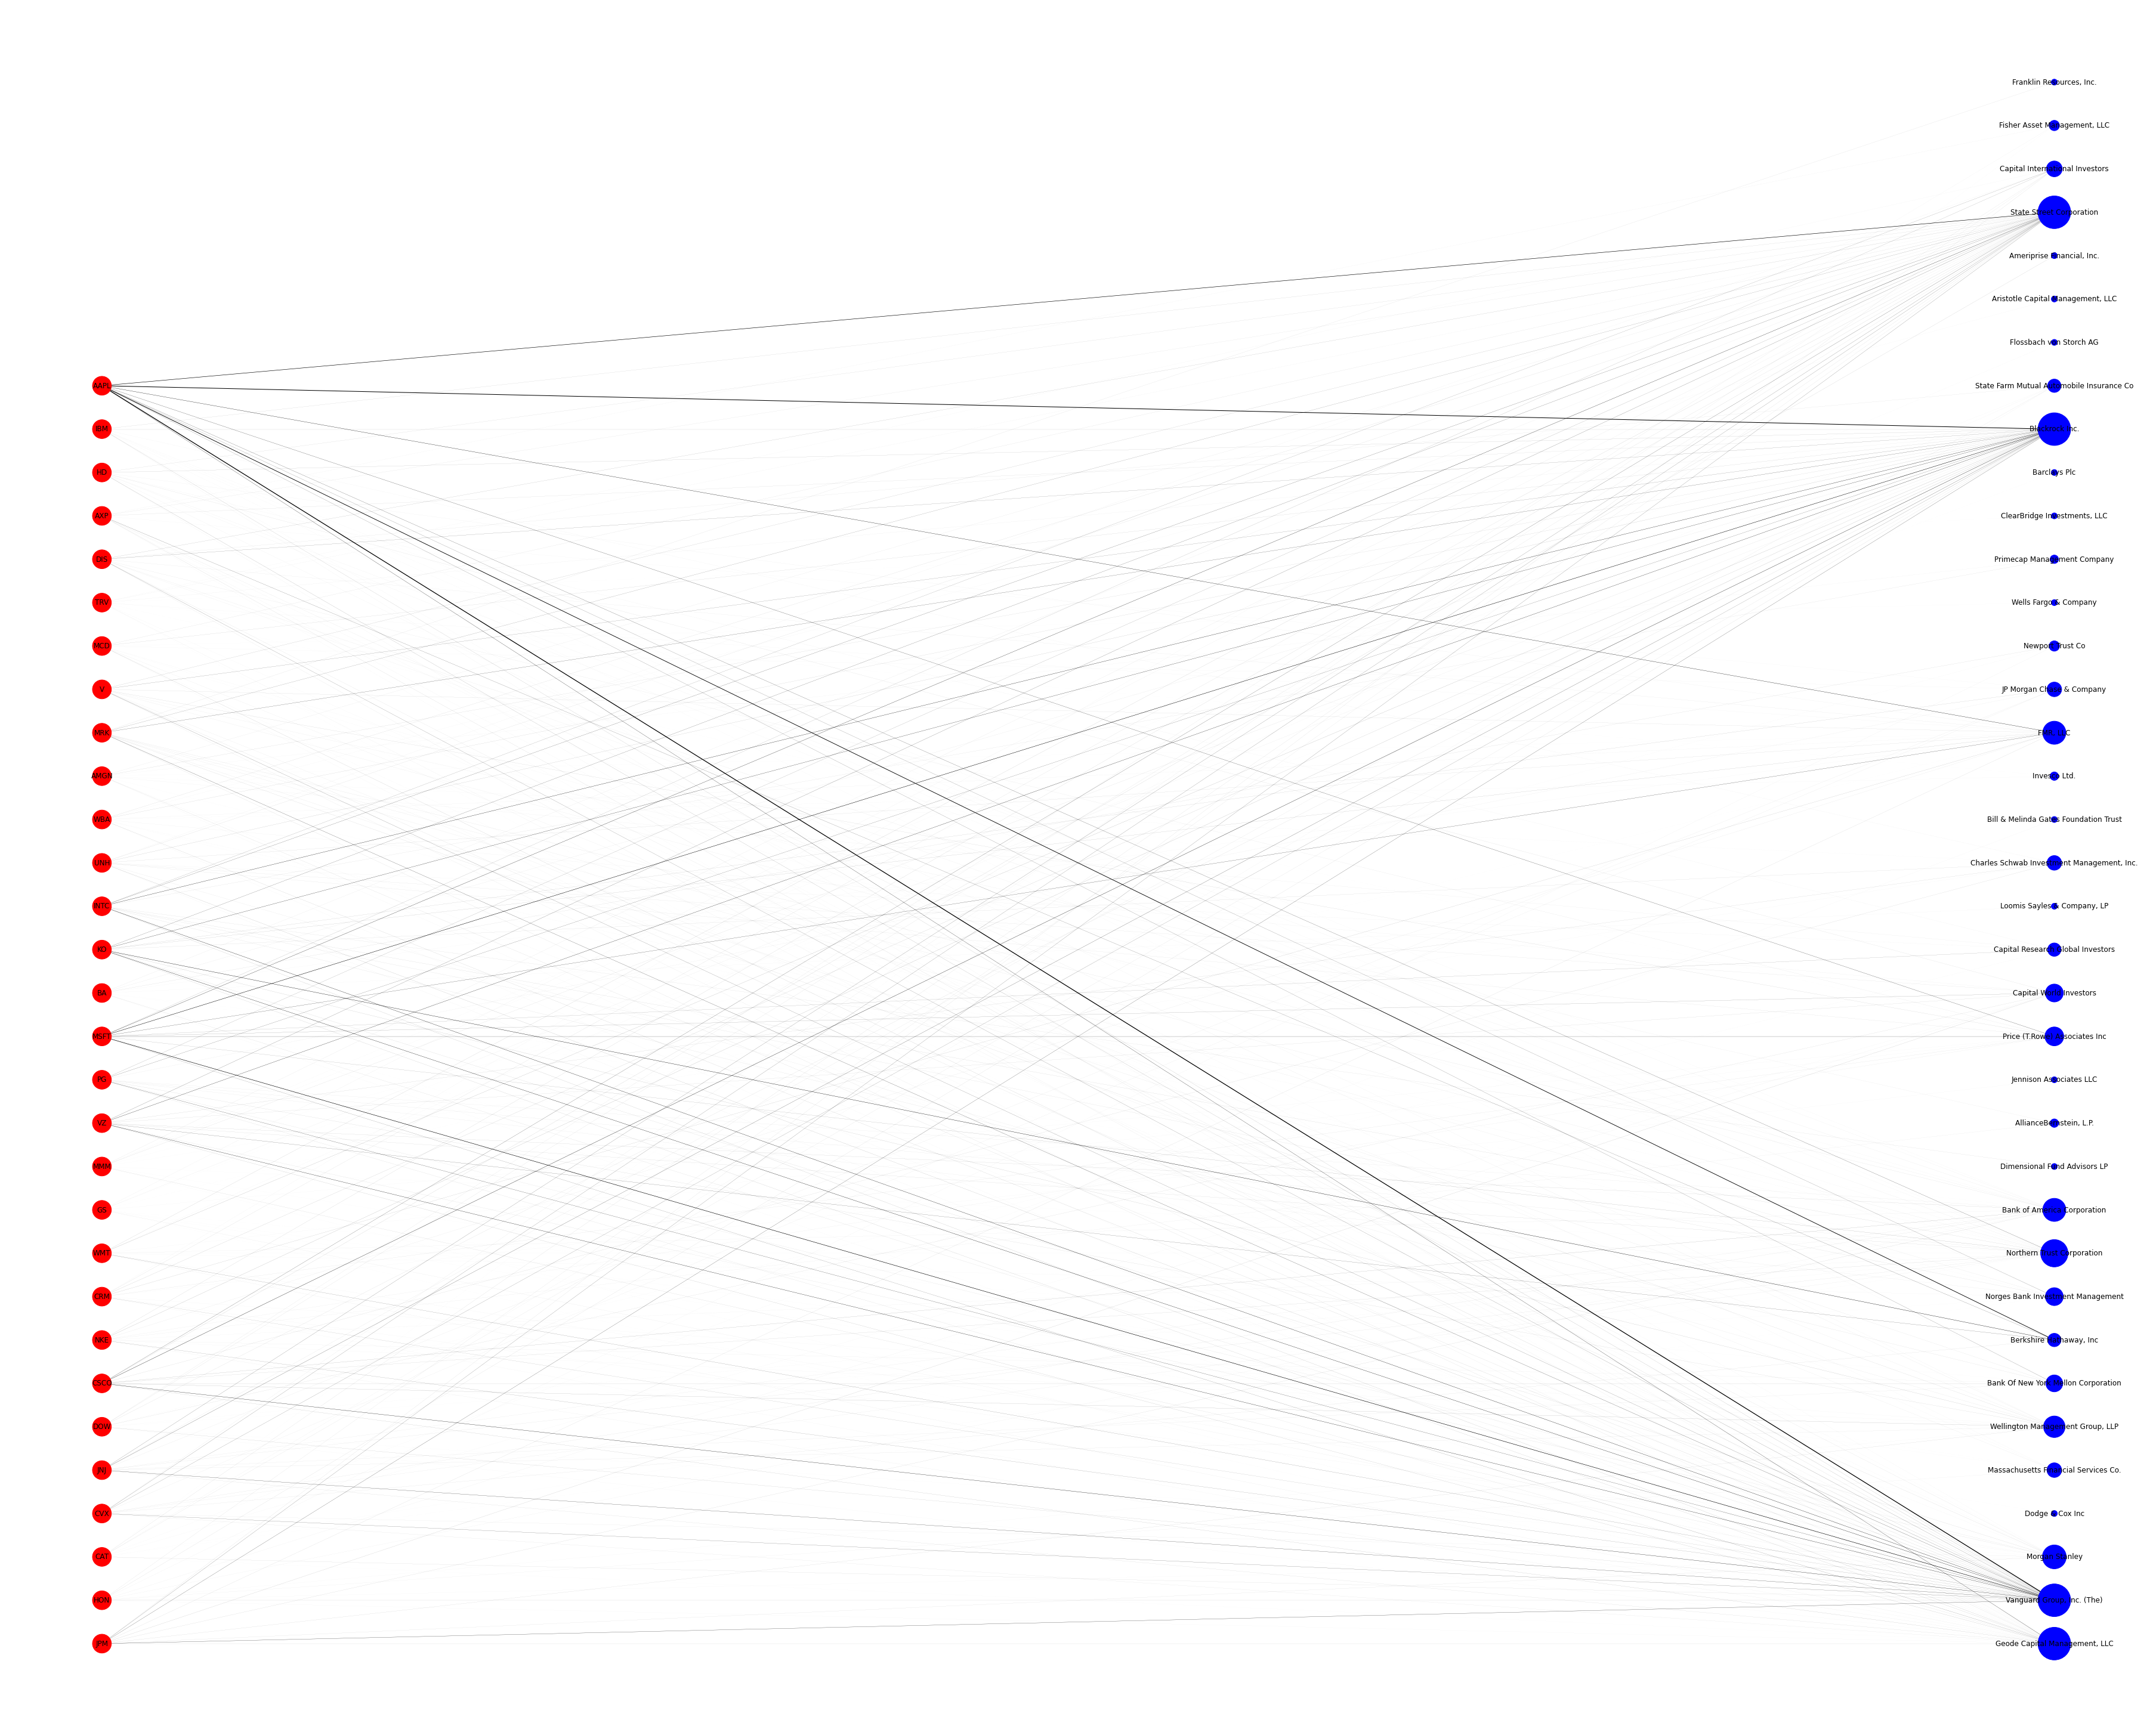

In [62]:
# hello dow jones network
plt.figure(figsize=(50,40))
nx.draw(B, pos=pos,
        with_labels=True,
        node_color = color_list,
        node_size = [v * 100 for v in dict(B.degree()).values()],
        width = [v[2]['shares']/1_000_000_000 for v in edge_list])
plt.show()

### Components

In [71]:
nx.number_connected_components(B)

1